In [1]:
# Discription : This program predicts weather a passenger will survive on titanic.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
titanic  = sns.load_dataset('titanic')

# Print the first five rows of the data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Count the number of rows and columns in the dataset
titanic.shape

(891, 15)

In [5]:
# Some statistics about this data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get count of number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


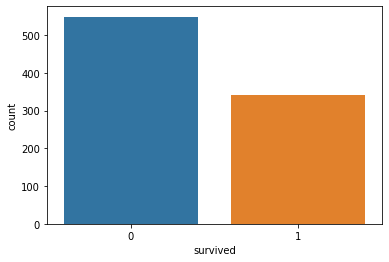

In [7]:
# Viusualize the count of survivors
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

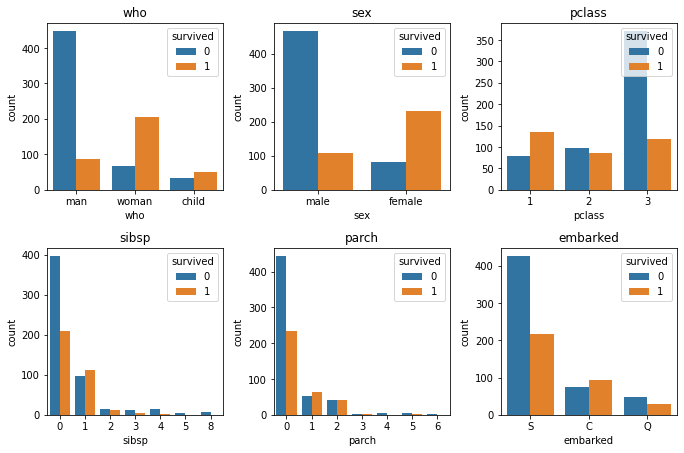

In [8]:
# Visualize the count of survivors for the columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# Subplot grid plot and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2)) 

for r in range(0, n_rows) :
  for c in range(0, n_cols) :

    i = r*n_cols + c  # index to go through the number of columns
    ax  =axs[r][c]  # Show where to position each subplot
    sns.countplot(titanic[cols[i]], hue  = titanic['survived'], ax = ax)
    ax.set_title(cols[i])
    ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()

In [9]:
# Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
# Look at survival rate by sex and class
titanic.pivot_table('survived' , index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


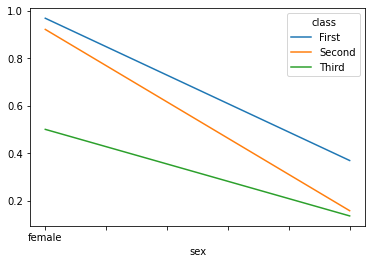

In [11]:
# Look at survival rate by sex and class visually
titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

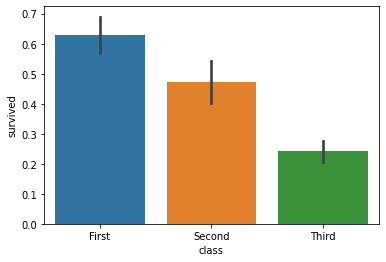

In [12]:
# Plot the survival rate of each class
sns.barplot(x = 'class', y = 'survived', data = titanic)

In [13]:
# Look at survival rate by sex, age and class
age = pd.cut( titanic['age'], [0, 18, 80])
titanic.pivot_table('survived',  index = ['sex', age], columns = 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

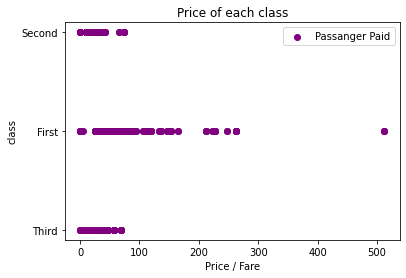

In [14]:
# Plot the prices paid in classes
plt.scatter(titanic['fare'], titanic['class'], color = 'purple', label = 'Passanger Paid')
plt.ylabel('class')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [15]:
# Count the empty value in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
# Look at all the values in each column and get a  count
for i in titanic:
  print(titanic[i].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
# Drop the column
titanic = titanic.drop(['who', 'embark_town', 'adult_male', 'class', 'alive', 'deck', 'alone'], axis = 1)

# Remove the rows with missing values
titanic = titanic.dropna( subset = ['age', 'embarked'])

In [18]:
# Count the new number of rows and columns in dataset now
titanic.shape

(712, 8)

In [19]:
# Look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
# Unique vales of column sex and embarked
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex and embarked columns
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [22]:
# Unique vales of column sex and embarked
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [23]:
# Data types of columns of data set
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [24]:
# Split the data into independent 'X' and dependent 'Y'
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [25]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [26]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# Create a function with many machine learning models
def models(X_train, Y_train):

  # Use Logistic FRegression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Use kneighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5,  metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  # Use SVC (Linear kernal)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # Use SVC (rbf kernal)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train) 

  # Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  # Use decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Use RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Print the training accuracy of each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]k Neighbors Regression Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Desicion Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest  Training Accuracy: ', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest



In [28]:
# Get and train all models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]k Neighbors Regression Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Desicion Tree Training Accuracy:  0.9929701230228472
[6]Random Forest  Training Accuracy:  0.9929701230228472


In [29]:
#  Shoe the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)) :
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP+ TN) / (TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy ="{}"'.format(i, test_score ))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy ="0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy ="0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy ="0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy ="0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy ="0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy ="0.7202797202797203"

[[68 14]
 [15 46]]
Model[6] Testing Accuracy ="0.7972027972027972"



In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train, Y_train, cv=10, scoring = "accuracy")
print("scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

scores: [0.66666667 0.77192982 0.75438596 0.85964912 0.73684211 0.80701754
 0.78947368 0.77192982 0.80701754 0.82142857]
Mean: 0.7786340852130326
Standard Deviation: 0.05008460909968162


In [31]:
# Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature' : titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.293
fare,0.283
sex,0.203
pclass,0.093
sibsp,0.053
parch,0.043
embarked,0.032


In [32]:
#from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
print(round(acc_random_forest,2),'%')

99.3 %


In [33]:
print("oob_score:", round(random_forest.oob_score_,4)*100, '%')

oob_score: 79.61 %


In [40]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {"criterion" : ["gini", "entropy"], "min_samples_leaf" : [1,5,10,25,50,70], "min_samples_split" : [2,4,10,12,16,18,25,35], "n_estimators" : [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
clf = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)
clf.fit(X_train, Y_train)
clf.bestparams

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
TN1, FP1, FN1, TP1 = confusion_matrix (Y_train, predictions).ravel()
test_score1 = (TP+ TN) / (TP + TN + FN + FP)
print('Testing Accuracy ="{}"'.format(test_score1))

Testing Accuracy ="0.7972027972027972"


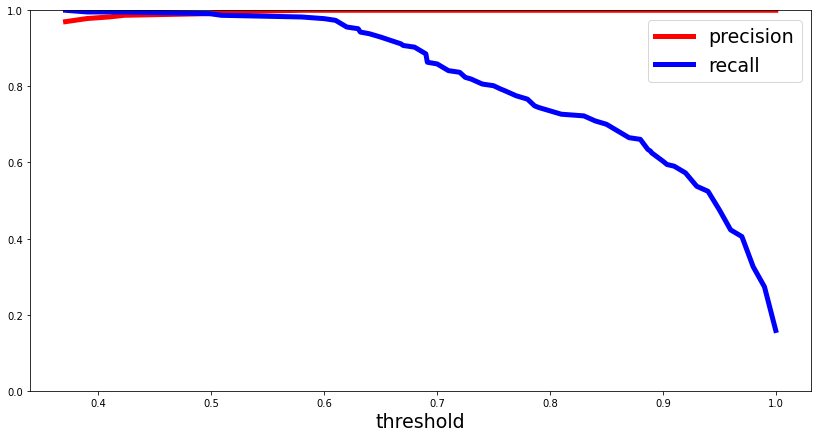

In [36]:
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_recall(precision, recall, threshold):
  plt.plot(threshold,precision[:-1], "r-", label="precision", linewidth = 5)
  plt.plot(threshold,recall[:-1], "b", label="recall", linewidth = 5)
  plt.xlabel("threshold", fontsize = 19)
  plt.legend(loc = "upper right", fontsize = 19)
  plt.ylim([0,1])
plt.figure(figsize = (14,7))
plot_precision_recall(precision, recall, threshold)
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
ra_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-SCORE:", ra_score)

ROC-AUC-SCORE: 0.9998647499806786


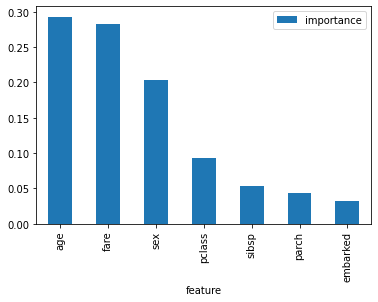

In [38]:
# Visualize the importance
importances.plot.bar()

In [39]:
# Print thr prediction of random Forest Classifier
pred = model[6].predict(X_test)
print(pred)

print()

# Print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [40]:
# My survival
my_survival = [[ 1, 0, 21, 8, 6, 1200, 0]]

# Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Oh no! You did not make it.')
else:
  print('Nice! You survived !')

[0]
Oh no! You did not make it.
